In [233]:
# Blake Zurman
# HW 2 Imputation Evaluation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

train_df = pd.read_csv('hw-2-training-data.csv')
test_df = pd.read_csv('hw-2-test-data.csv')
og_train_df = train_df.copy()
og_test_df = test_df.copy()

#print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())
train_df.head()


#sns.pairplot(train_df)
#plt.show()

              age          bmi  systolic_bp  diastolic_bp       smoker  \
count  2000.00000  1808.000000  1799.000000   1786.000000  1793.000000   
mean     48.85950    26.344389   135.171377     89.927616     0.491355   
std      18.16942     6.129855    32.525098     21.605908     0.500065   
min      18.00000   -30.416670  -160.014136    -88.834527     0.000000   
25%      34.00000    21.890592   110.033893     73.460413     0.000000   
50%      49.00000    26.130707   134.482817     88.391699     0.000000   
75%      64.25000    30.555388   158.019690    104.559413     1.000000   
max      80.00000    57.274114   314.622726    223.034901     1.000000   

       family_history    shoe_size  cholesterol_level  has_disease  
count     1808.000000  2000.000000        1798.000000  2000.000000  
mean         0.497235     9.087420         200.182596     0.500000  
std          0.500131     2.482624          63.609497     0.500125  
min          0.000000     5.001726        -326.500224    

,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level,has_disease
0,Female,63,26.051019,96.865801,74.879872,Regularly,0.0,0.0,Poor,PA,5.560992,208.921743,1
1,Male,51,28.999501,115.878612,113.660525,Regularly,1.0,0.0,Average,PA,12.098365,246.817639,1
2,Female,76,21.135693,144.846268,132.404670,Rarely,0.0,0.0,Poor,FL,6.751833,232.486516,1
3,Male,77,21.610457,NaN,128.789122,Rarely,0.0,0.0,NaN,MI,11.893455,273.670761,1
4,Female,68,22.311965,163.945914,84.559669,Frequently,1.0,0.0,Average,NY,6.983366,208.985119,1


In [235]:
import pandas as pd
''' 
    IMPUTE WITH MEDIAN
    takes a data frame and target columns
    imputes the columns with median
'''
# impute funct
def impute_columns_with_median(df, columns, verbose=False):
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' does not exist in the DataFrame.")

        if verbose:
            print(f"Missing values in '{column}' before imputation:", df[column].isnull().sum())
        
        # Impute missing values with the median of the specified column
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
        
        if verbose:
            print(f"Missing values in '{column}' after imputation:", df[column].isnull().sum())

    return df

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
# outliers funct
def impute_outliers_z_score(df, columns, threshold=3):
    original_df = df.copy()
    
    for column in columns:
        # Calculate Z-scores for the specified column
        df['Z_Score'] = zscore(df[column])

        # Identify outliers
        outliers = df[np.abs(df['Z_Score']) > threshold]

        # Impute outliers with the median of the column
        median_value = df[column].median()
        df.loc[outliers.index, column] = median_value

        # Drop the Z_Score column for the next iteration
        df = df.drop(columns='Z_Score')

        # Plot original data and data after imputation
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Original Data
        axs[0].boxplot(original_df[column].dropna())
        axs[0].set_title(f'Original Data ({column})')

        # Data after Outlier Imputation
        axs[1].boxplot(df[column].dropna())
        axs[1].set_title(f'Data after Outlier Imputation ({column})')

        plt.tight_layout()
        plt.show()

    return df

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# encoding funct
'''
    ENCODING FUNCTION
    Input df and target columns
    Function label encodes the columns
'''
def label_encode_columns(df, columns):
    label_encoder = LabelEncoder()
    
    for column in columns:
        if column in df.columns:
            # Perform label encoding
            df[column] = label_encoder.fit_transform(df[column])
        else:
            print(f"Warning: Column '{column}' not found in the DataFrame.")
    
    return df

In [7]:
from sklearn.preprocessing import StandardScaler
# scaler funct
'''
    SCALER FUNCTION
    Input df and target columns
    uses standard scaler
'''
def scale_columns(df, columns_to_scale):
    # Create a scaler instance
    scaler = StandardScaler()
    
    # Fit and transform only the specified columns
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    return df


Missing values in 'bmi' before imputation: 192
Missing values in 'bmi' after imputation: 0
Missing values in 'systolic_bp' before imputation: 201
Missing values in 'systolic_bp' after imputation: 0
Missing values in 'diastolic_bp' before imputation: 214
Missing values in 'diastolic_bp' after imputation: 0
Missing values in 'smoker' before imputation: 207
Missing values in 'smoker' after imputation: 0
Missing values in 'family_history' before imputation: 192
Missing values in 'family_history' after imputation: 0
Missing values in 'cholesterol_level' before imputation: 202
Missing values in 'cholesterol_level' after imputation: 0


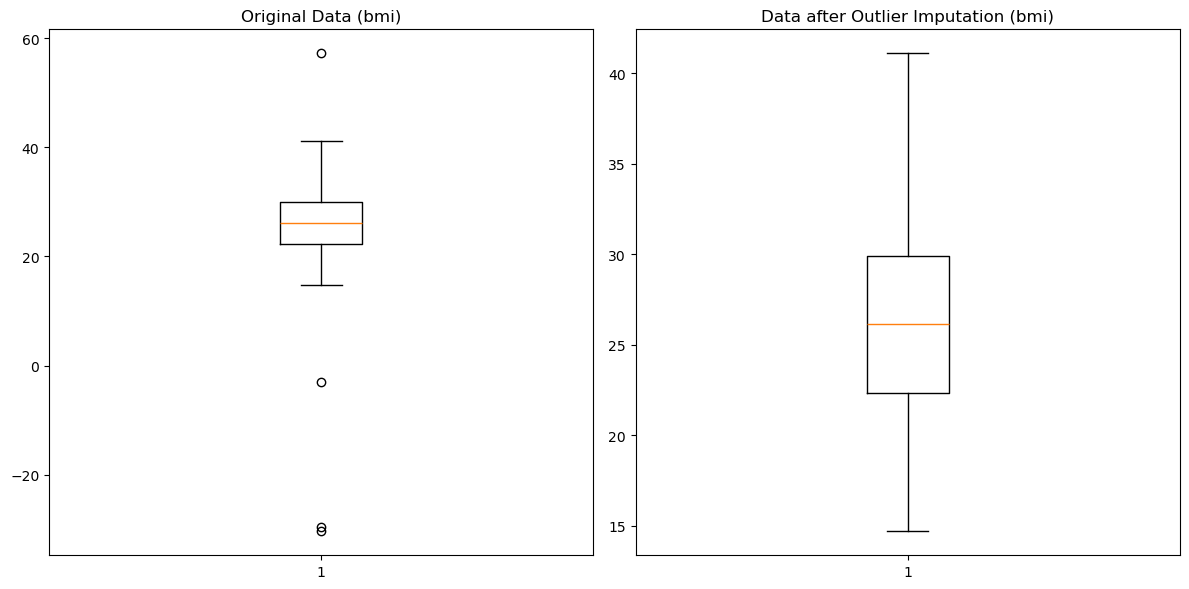

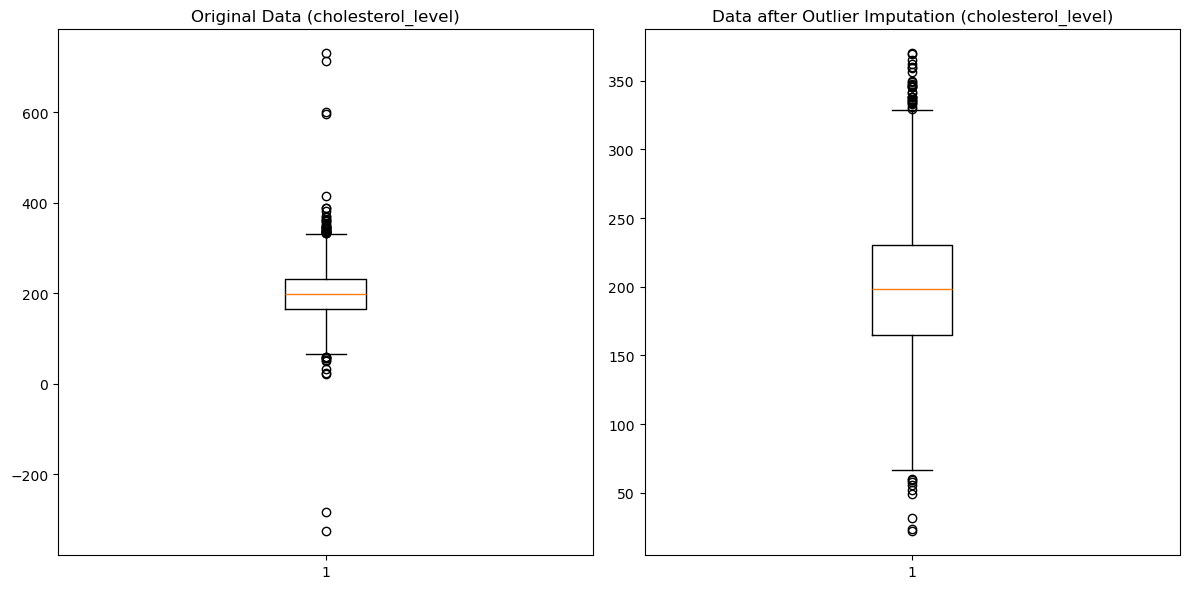

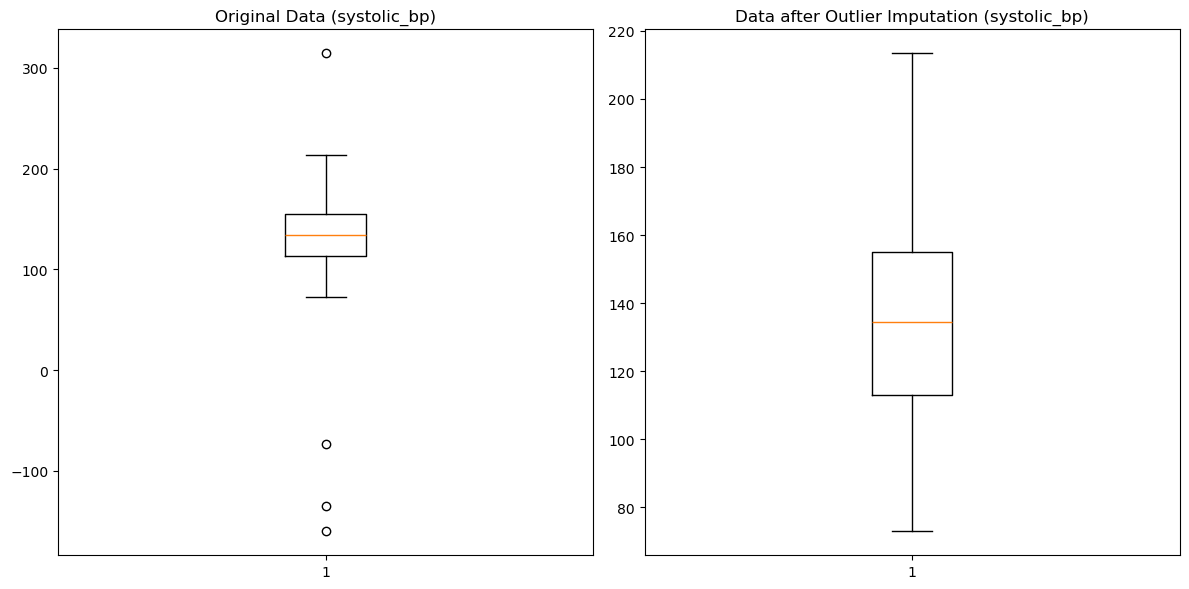

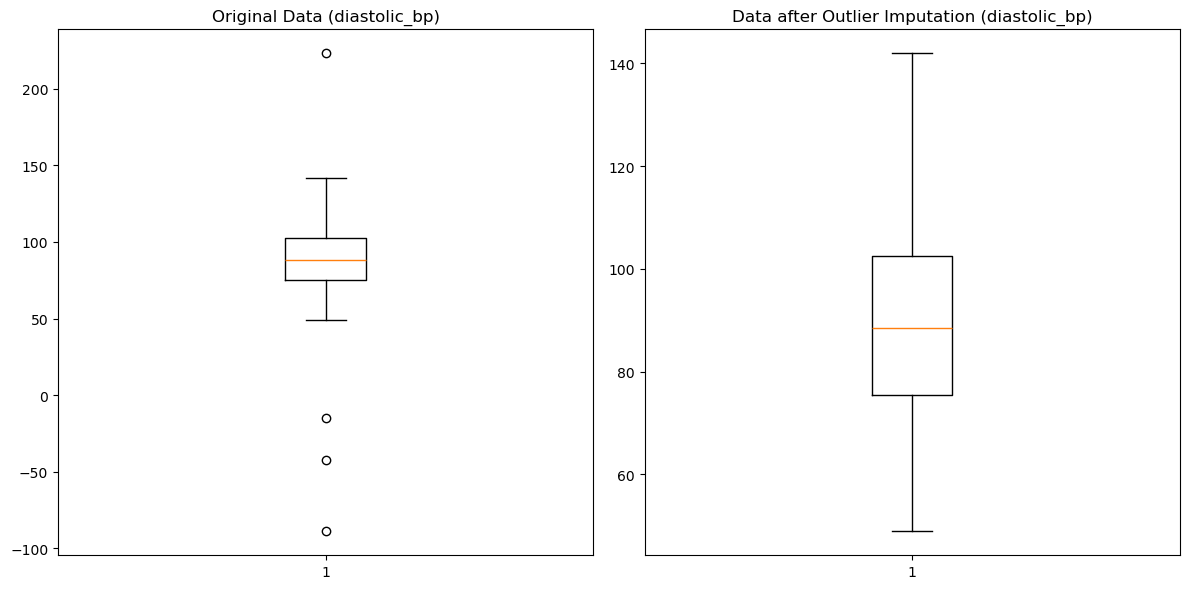

Missing values in 'exercise_frequency' before imputation: 0
Missing values in 'exercise_frequency' after imputation: 0
Missing values in 'diet_quality' before imputation: 0
Missing values in 'diet_quality' after imputation: 0


In [243]:
# RUNNING ALL FUNCTIONS ON TRAIN

# 1. Impute nulls
# features to impute
columns_to_impute = ['bmi', 'systolic_bp', 'diastolic_bp', 'smoker', 'family_history', 'cholesterol_level']
# Impute the columns in the DataFrame
train_df = impute_columns_with_median(train_df, columns_to_impute, verbose=True)

# 2. Outliers handled
# features with outliers
columns = ['bmi', 'cholesterol_level', 'systolic_bp', 'diastolic_bp']
# Outliers numeric
no_outliers_train_df = impute_outliers_z_score(train_df, columns)

# 3. Encoding and then filling encoded nulls with median
# label encoding
train_df_encoded = label_encode_columns(no_outliers_train_df, ['exercise_frequency', 'diet_quality', 'gender'])
# imputing the encoded columns also
impute_column_with_median(train_df_encoded, 'exercise_frequency', verbose=True)
impute_column_with_median(train_df_encoded, 'diet_quality', verbose=True)

# 4. Scaling
#features
columns_to_scale = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_level']
# Scale the specified columns
train_df_scaled = scale_columns(train_df_encoded, columns_to_scale)
clean_train_df = train_df_scaled.copy()

Missing values in 'bmi' before imputation: 31
Missing values in 'bmi' after imputation: 0
Missing values in 'systolic_bp' before imputation: 32
Missing values in 'systolic_bp' after imputation: 0
Missing values in 'diastolic_bp' before imputation: 19
Missing values in 'diastolic_bp' after imputation: 0
Missing values in 'smoker' before imputation: 24
Missing values in 'smoker' after imputation: 0
Missing values in 'family_history' before imputation: 40
Missing values in 'family_history' after imputation: 0
Missing values in 'cholesterol_level' before imputation: 34
Missing values in 'cholesterol_level' after imputation: 0


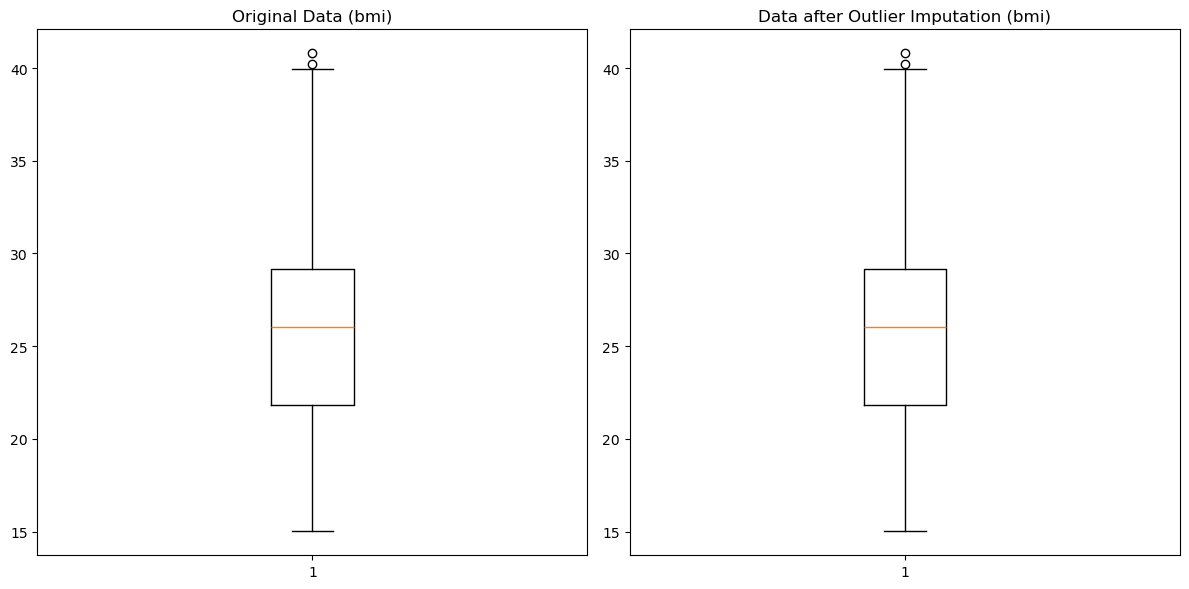

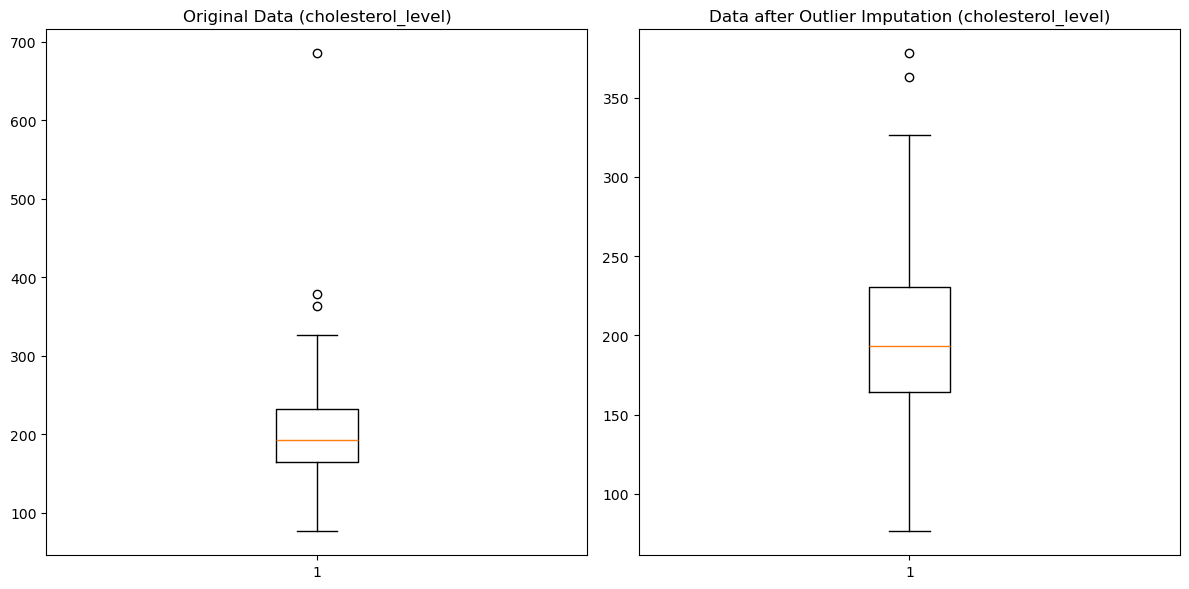

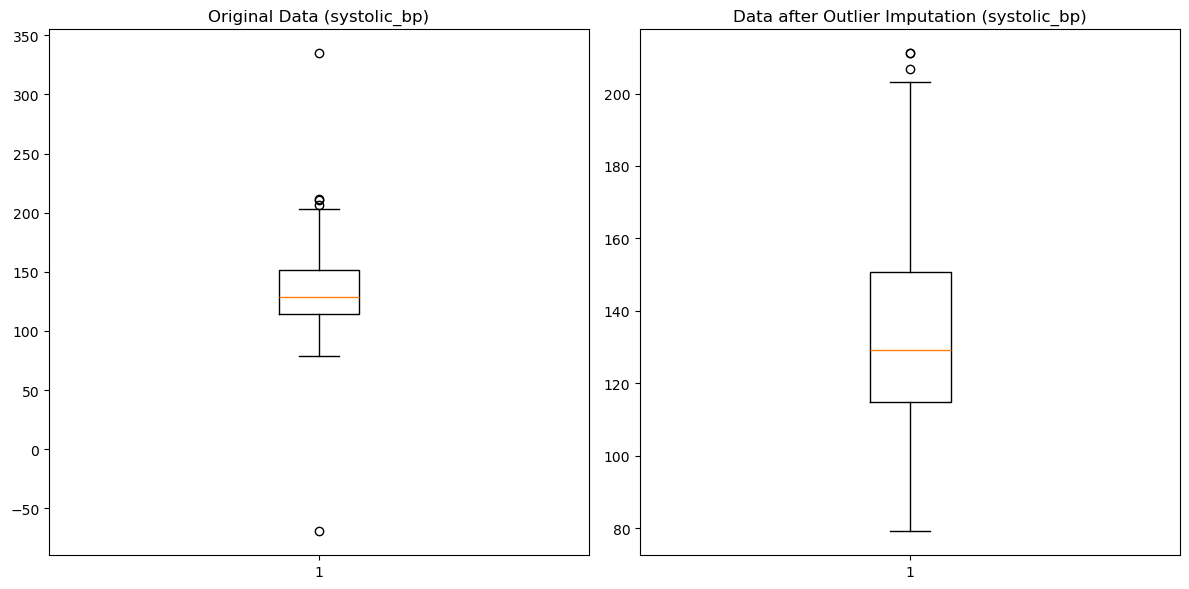

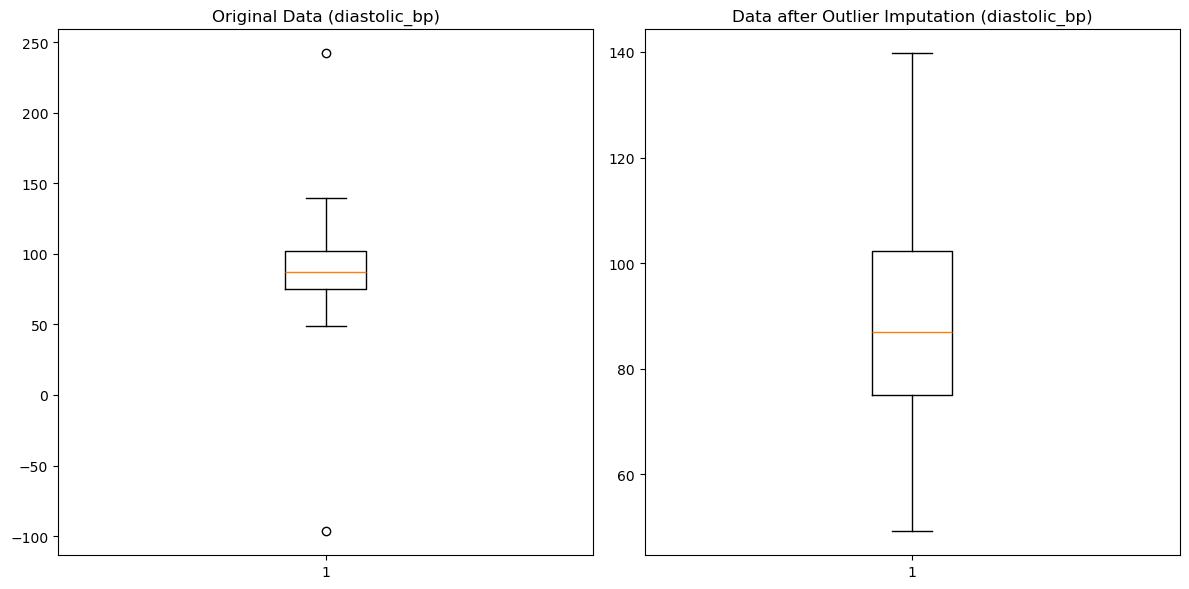

Missing values in 'exercise_frequency' before imputation: 0
Missing values in 'exercise_frequency' after imputation: 0
Missing values in 'diet_quality' before imputation: 0
Missing values in 'diet_quality' after imputation: 0


In [245]:
# RUNNING ALL FUNCTIONS ON TEST

# 1. Impute nulls
# features to impute
columns_to_impute = ['bmi', 'systolic_bp', 'diastolic_bp', 'smoker', 'family_history', 'cholesterol_level']
# Impute the columns in the DataFrame
test_df = impute_columns_with_median(test_df, columns_to_impute, verbose=True)

# 2. Outliers handled
# features with outliers
columns = ['bmi', 'cholesterol_level', 'systolic_bp', 'diastolic_bp']
# Outliers numeric
no_outliers_test_df = impute_outliers_z_score(test_df, columns)

# 3. Encoding and then filling encoded nulls with median
# label encoding
test_df_encoded = label_encode_columns(no_outliers_test_df, ['exercise_frequency', 'diet_quality', 'gender'])
# imputing the encoded columns also
impute_column_with_median(test_df_encoded, 'exercise_frequency', verbose=True)
impute_column_with_median(test_df_encoded, 'diet_quality', verbose=True)

# 4. Scaling
#features
columns_to_scale = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_level']
# Scale the specified columns
test_df_scaled = scale_columns(test_df_encoded, columns_to_scale)
clean_test_df = test_df_scaled.copy()

In [277]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ONLY USING TRAIN DATA SET

def logistic_regression_model(df, target_column, feature_columns):
    # One-hot encode 'us_state' if it's among the feature columns
    if 'us_state' in feature_columns:
        df = pd.get_dummies(df, columns=['us_state'], prefix='us_state')
        # Update feature columns to include new one-hot encoded columns
        feature_columns = [col for col in df.columns if col.startswith('us_state') or col in feature_columns]
        
    # Separate the features and target based on selected columns
    X = df[feature_columns]
    y = df[target_column]
    
    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X, y)
    
    # Make predictions on the same data
    y_pred = model.predict(X)
    
    # Evaluate the model
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("Classification Report:\n", classification_report(y, y_pred))


In [281]:
# Features that don't seem to help accuracy
# smoker
# gender
# exercise_freq
# shoe_size
# family_history

train_df = clean_train_df  

target_column = 'has_disease'
feature_columns = ['age','bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_level', 'diet_quality']

logistic_regression_model(train_df, target_column, feature_columns)


Accuracy: 0.8665
Confusion Matrix:
 [[864 136]
 [131 869]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.86      0.87      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [289]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# USE TEST FILE AND SAVE TO 'answers.csv'


def logistic_regression_model(train_df, test_df, target_column, feature_columns, output_file='answers.csv'):
    # One-hot encode 'us_state' if it's among the feature columns in the training DataFrame
    if 'us_state' in feature_columns:
        train_df = pd.get_dummies(train_df, columns=['us_state'], prefix='us_state')
        test_df = pd.get_dummies(test_df, columns=['us_state'], prefix='us_state')
        
        # Update feature columns to include new one-hot encoded columns
        feature_columns = [col for col in train_df.columns if col.startswith('us_state') or col in feature_columns]

    # Separate the features and target from the training data
    X_train = train_df[feature_columns]
    y_train = train_df[target_column]
    
    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Separate the features from the test data
    X_test = test_df[feature_columns]
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Create a DataFrame for the predictions
    predictions_df = test_df.copy()  # Make a copy of the test DataFrame
    predictions_df['predicted_disease'] = y_pred  # Add predictions to the DataFrame

    # Save predictions to a CSV file
    predictions_df.to_csv(output_file, index=False)
    print(f"Predictions saved to {output_file}")

# Usage example:
train_df = clean_train_df  
test_df = clean_test_df
target_column = 'has_disease'
feature_columns = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_level', 'diet_quality']

logistic_regression_model(train_df, test_df, target_column, feature_columns)


Predictions saved to answers.csv
